# Healthcare/Stroke Dataset Exploratory Analysis

This notebook consists of code exploring a stroke dataset. This code was written while following along with the lecture on March 31, 2023 demonstrating GitHub Copilot.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
# q: how many missing values are there in each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only the bmi variable has missing values. We can just drop missing values.

In [4]:
df = df.dropna()

In [5]:
# q: How can I determine how balanced the data is?
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [6]:
df.hypertension.value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

In [7]:
df.heart_disease.value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

The unbalanced data might prove to be a problem when creating our models.

Next, I want to understand the classes present in the categorical variables.

In [8]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [9]:
df.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [10]:
df.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [11]:
df.Residence_type.value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [12]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [13]:
# q: how correlated are the features?
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


<AxesSubplot:>

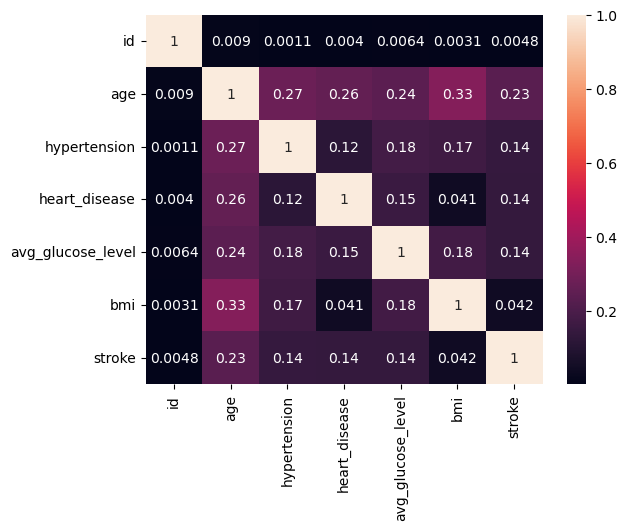

In [14]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='stroke', ylabel='count'>

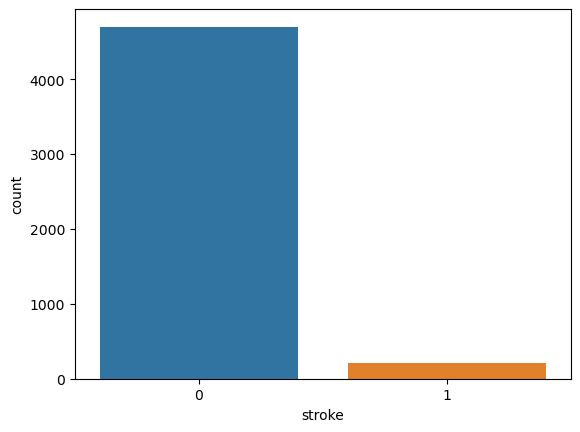

In [15]:
sns.countplot(x="stroke", data=df)

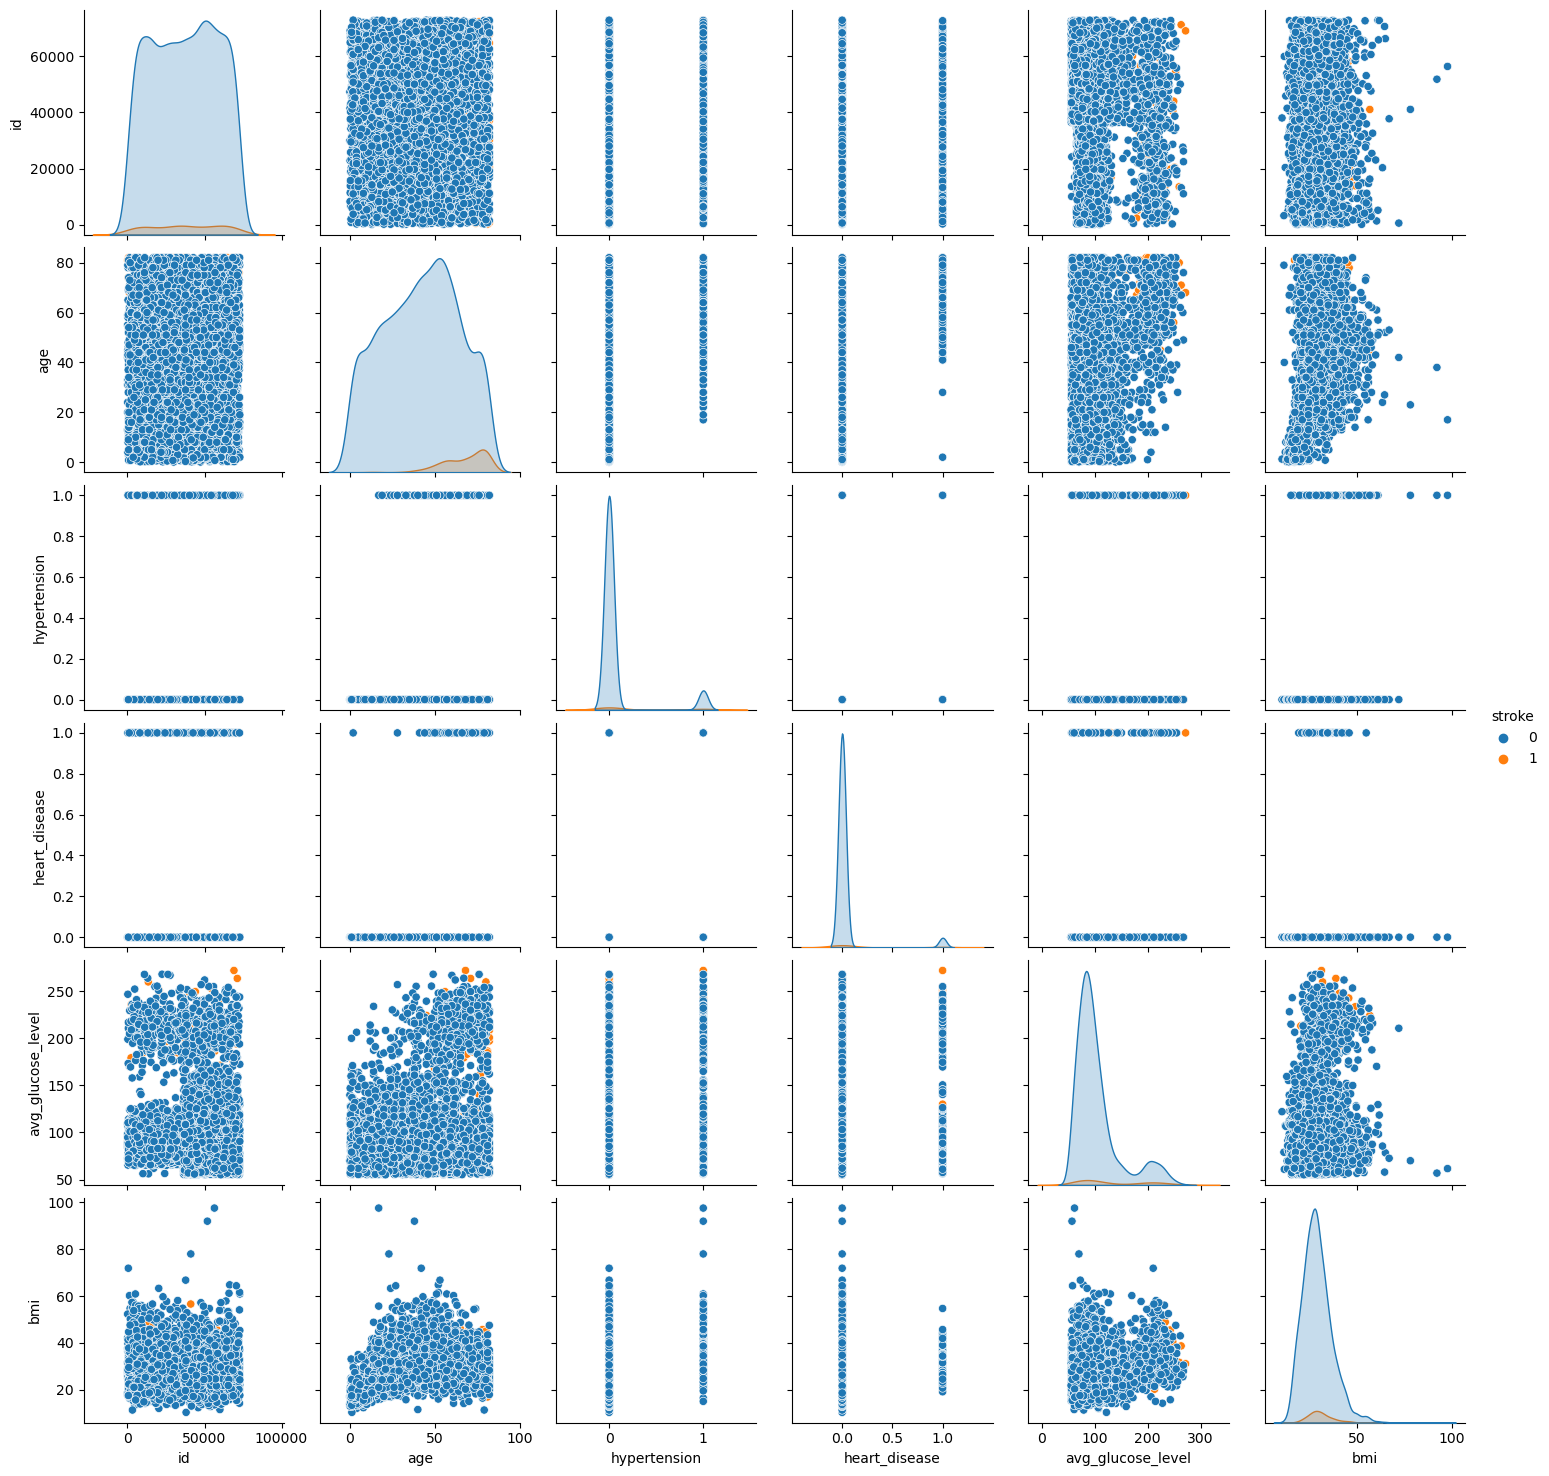

In [16]:
sns.pairplot(df, hue="stroke")

In [17]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

<AxesSubplot:xlabel='bmi', ylabel='age'>

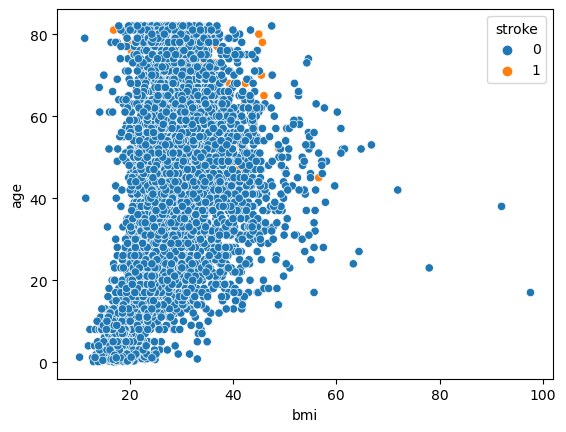

In [18]:
sns.scatterplot(x="bmi", y="age", hue="stroke", data=df)

### Goal: perform a binary classifier for this dataset